In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [4]:
data = pd.read_csv('../input/transactions_obf.csv')
labels_data = pd.read_csv('../input/labels_obf.csv')

In [88]:
data.head()

,transactionTime,eventId,accountNumber,merchantId,mcc,merchantCountry,merchantZip,posEntryMode,transactionAmount,availableCash
0,2017-01-01T00:00:00Z,18688431A1,94f9b4e7,b76d06,5968,826,CR0,1,10.72,7500
1,2017-01-01T00:49:03Z,2164986A1,648e19cf,718cc6,5499,826,DE14,81,21.19,4500
2,2017-01-01T00:43:17Z,31294145A1,c0ffab1b,94cafc,5735,442,NaN,81,5.04,9500
3,2017-01-01T00:15:07Z,11162049A1,038099dd,7d5803,5499,826,NR1,81,21.00,7500
4,2017-01-01T00:37:09Z,17067235A1,3130363b,12ca76,5411,826,M50,81,47.00,10500


In [89]:
data.shape

(118621, 10)

In [90]:
data.columns

Index(['transactionTime', 'eventId', 'accountNumber', 'merchantId', 'mcc',
       'merchantCountry', 'merchantZip', 'posEntryMode', 'transactionAmount',
       'availableCash'],
      dtype='object')

In [91]:
labels_data.head()

,reportedTime,eventId
0,2017-01-04T00:00:00Z,101536329A1
1,2017-01-04T00:00:00Z,101536425A1
2,2017-01-04T00:00:00Z,101536473A1
3,2017-01-04T00:00:00Z,101536617A1
4,2017-01-04T00:00:00Z,101536761A1


In [92]:
labels_data.shape

(875, 2)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118621 entries, 0 to 118620
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   transactionTime    118621 non-null  object 
 1   eventId            118621 non-null  object 
 2   accountNumber      118621 non-null  object 
 3   merchantId         118621 non-null  object 
 4   mcc                118621 non-null  int64  
 5   merchantCountry    118621 non-null  int64  
 6   merchantZip        95616 non-null   object 
 7   posEntryMode       118621 non-null  int64  
 8   transactionAmount  118621 non-null  float64
 9   availableCash      118621 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 9.1+ MB


In [94]:
labels_data['eventId'].unique().shape

(875,)

In [95]:
for col in data.columns:
    print(col, len(data[col].unique()))

transactionTime 118105
eventId 118621
accountNumber 766
merchantId 33327
mcc 361
merchantCountry 82
merchantZip 3261
posEntryMode 10
transactionAmount 16431
availableCash 19


In [96]:
labels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reportedTime  875 non-null    object
 1   eventId       875 non-null    object
dtypes: object(2)
memory usage: 13.8+ KB


In [97]:
len(labels_data)

875

In [98]:
lst = [labels_data['eventId'][i] for i in range(len(labels_data))]
a = '(' + '|'.join(lst) + ')'

data['fraudReported'] = data.eventId.str.extract(a, expand=False).fillna(0)

In [99]:
data['fraudReported'] = data['fraudReported'].astype(bool).astype(int)

In [100]:
(data[data['fraudReported']!=0])

,transactionTime,eventId,accountNumber,merchantId,mcc,merchantCountry,merchantZip,posEntryMode,transactionAmount,availableCash,fraudReported
14,2017-01-01T03:53:34Z,85602730A1,645c318d,66f14e,5541,36,NaN,5,10.95,1500,1
740,2017-01-03T13:15:07Z,101536761A1,f42ba1f1,5f7cd4,5968,840,NaN,81,18.06,1500,1
741,2017-01-03T13:27:22Z,101536857A1,f42ba1f1,aebafc,4814,826,0,1,11.00,1500,1
743,2017-01-03T13:27:02Z,101536329A1,f42ba1f1,aebafc,4814,826,0,1,9.00,1500,1
744,2017-01-03T13:38:15Z,101536953A1,f42ba1f1,7e57ae,4816,840,NaN,81,0.00,1500,1
...,...,...,...,...,...,...,...,...,...,...,...
117046,2018-01-26T14:08:44Z,14215297A1,499ef8d0,1fe47b,5734,840,NaN,81,117.99,7500,1
117213,2018-01-26T22:25:45Z,15926483A1,44c5d9ae,dde98b,6300,380,NaN,81,206.66,1500,1
117224,2018-01-26T23:30:06Z,15927635A1,44c5d9ae,0e8039,6300,826,PE2,1,123.25,1500,1
117239,2018-01-27T00:21:36Z,15930035A1,44c5d9ae,30a3b3,4812,826,CR0,1,19.00,1500,1


In [101]:
data.shape

(118621, 11)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118621 entries, 0 to 118620
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   transactionTime    118621 non-null  object 
 1   eventId            118621 non-null  object 
 2   accountNumber      118621 non-null  object 
 3   merchantId         118621 non-null  object 
 4   mcc                118621 non-null  int64  
 5   merchantCountry    118621 non-null  int64  
 6   merchantZip        95616 non-null   object 
 7   posEntryMode       118621 non-null  int64  
 8   transactionAmount  118621 non-null  float64
 9   availableCash      118621 non-null  int64  
 10  fraudReported      118621 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 9.5+ MB


In [103]:
# check for negative values
numerical_features = [col for col in data.columns if data[col].dtype != 'O']

In [104]:
for col in numerical_features:
    if data[data[col] < 0].shape[0] > 1:
        print(f'{col} has {data[data[col] < 0].shape[0]} negative values')
        

transactionAmount has 183 negative values


check for neg values first, fraud or not

In [105]:
neg_transaction = data[data['transactionAmount'] < 0]
neg_transaction[neg_transaction['fraudReported'] == 1]

,transactionTime,eventId,accountNumber,merchantId,mcc,merchantCountry,merchantZip,posEntryMode,transactionAmount,availableCash,fraudReported
90279,2017-10-23T08:50:21Z,47542019A1,3ec9dda7,e8e752,5942,124,NaN,81,-0.03,3500,1
90334,2017-10-23T08:24:02Z,47545619A1,3ec9dda7,e8e752,5942,124,NaN,81,-0.12,3500,1
90357,2017-10-23T11:47:20Z,47544563A1,3ec9dda7,e8e752,5942,124,NaN,81,-0.03,3500,1


In [106]:
data[data['transactionAmount'] > data['availableCash']].shape

(31, 11)

In [107]:
data['transactionTime'] = pd.to_datetime(data['transactionTime'])

In [108]:
data.drop_duplicates(inplace=True)

In [109]:
data.shape

(118621, 11)

# EDA

#### Check for balanced data

<AxesSubplot:xlabel='fraudReported', ylabel='count'>

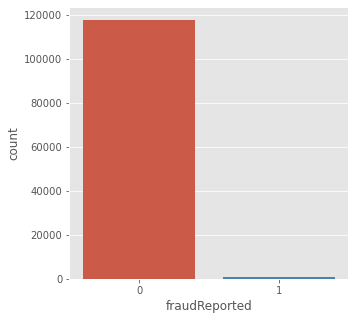

In [110]:
plt.figure(figsize = (5, 5))
sns.countplot(data['fraudReported'])

In [111]:
print(f"% of fraudulent cases: {round(len(data[data['fraudReported'] == 1])/len(data)*100, 2)}")

% of fraudulent cases: 0.74


#### How do the frauds reported distributed across months? Are they uniform of random?

In [112]:
grouped_date = pd.DataFrame(data.groupby(data['transactionTime'].dt.strftime('%Y/%m'))['fraudReported'].sum()).reset_index()
grouped_date

,transactionTime,fraudReported
0,2017/01,36
1,2017/02,31
2,2017/03,71
3,2017/04,59
4,2017/05,25
5,2017/06,151
6,2017/07,92
7,2017/08,74
8,2017/09,110
9,2017/10,101


In [113]:
data.head()

,transactionTime,eventId,accountNumber,merchantId,mcc,merchantCountry,merchantZip,posEntryMode,transactionAmount,availableCash,fraudReported
0,2017-01-01 00:00:00+00:00,18688431A1,94f9b4e7,b76d06,5968,826,CR0,1,10.72,7500,0
1,2017-01-01 00:49:03+00:00,2164986A1,648e19cf,718cc6,5499,826,DE14,81,21.19,4500,0
2,2017-01-01 00:43:17+00:00,31294145A1,c0ffab1b,94cafc,5735,442,NaN,81,5.04,9500,0
3,2017-01-01 00:15:07+00:00,11162049A1,038099dd,7d5803,5499,826,NR1,81,21.00,7500,0
4,2017-01-01 00:37:09+00:00,17067235A1,3130363b,12ca76,5411,826,M50,81,47.00,10500,0


In [114]:
data['yearMonth'] = data['transactionTime'].map(lambda x: str(x.year)+'_'+str(x.month))

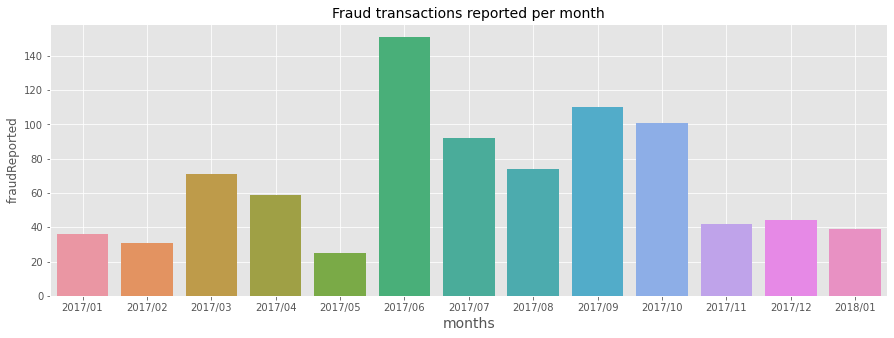

In [115]:
plt.figure(figsize = (15, 5))
sns.barplot(data=grouped_date, x='transactionTime', y='fraudReported')
plt.title('Fraud transactions reported per month', fontsize=14)
plt.xlabel('months', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

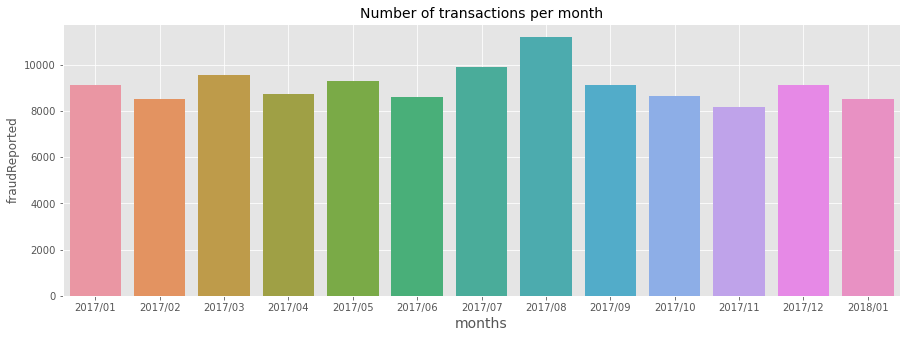

In [116]:
grouped_date_all = pd.DataFrame(data.groupby(data['transactionTime'].dt.strftime('%Y/%m'))['fraudReported'].count()).reset_index()

plt.figure(figsize = (15, 5))
sns.barplot(data=grouped_date_all, x='transactionTime', y='fraudReported')
plt.title('Number of transactions per month', fontsize=14)
plt.xlabel('months', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

#### Which account number has the frauds against them? 

In [117]:
grouped_accno = pd.DataFrame(data.groupby(data['accountNumber'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

In [118]:
top10_sus_accno = grouped_accno[grouped_accno['fraudReported'] != 0][:10]
top10_sus_accno

,accountNumber,fraudReported
0,8b9c15ea,97
1,3ec9dda7,59
2,6bab7602,48
3,39219923,45
4,1602df4e,41
5,7728d696,41
6,749acd16,24
7,0646d69d,24
8,bd9f22c1,18
9,4547ba27,17


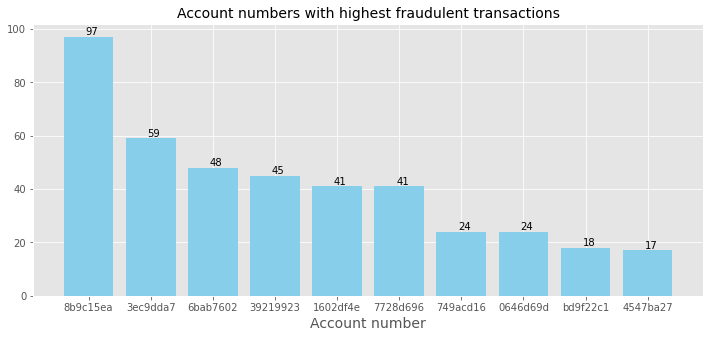

In [128]:

fig = plt.figure(figsize = (12,5))
bars = plt.bar(data=top10_sus_accno, x='accountNumber', height='fraudReported', color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.35, yval + 0.7, yval)
plt.title('Account numbers with highest fraudulent transactions', fontsize=14)
plt.xlabel('Account number', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

Account number is a very important feature in determining the fraudulent transaction as per the analysis above. There are a couple of accounts where there are more fraudulent transactions than successful ones which can be suspicious.

#### Which  merchant id has the frauds against them? 

In [48]:
grouped_merno = pd.DataFrame(data.groupby(data['merchantId'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

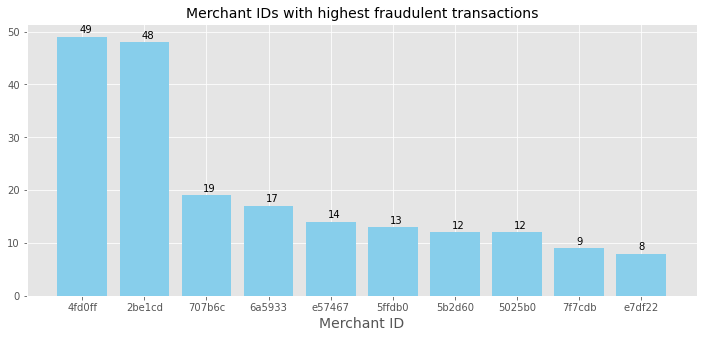

In [68]:
top10_sus_merno = grouped_merno[grouped_merno['fraudReported'] != 0][:10]
top10_sus_merno

fig = plt.figure(figsize = (12,5))
bars = plt.bar(data=top10_sus_merno, x='merchantId', height='fraudReported', color = 'SkyBlue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.35, yval + 0.7, yval)
plt.title('Merchant IDs with highest fraudulent transactions', fontsize=14)
plt.xlabel('Merchant ID', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

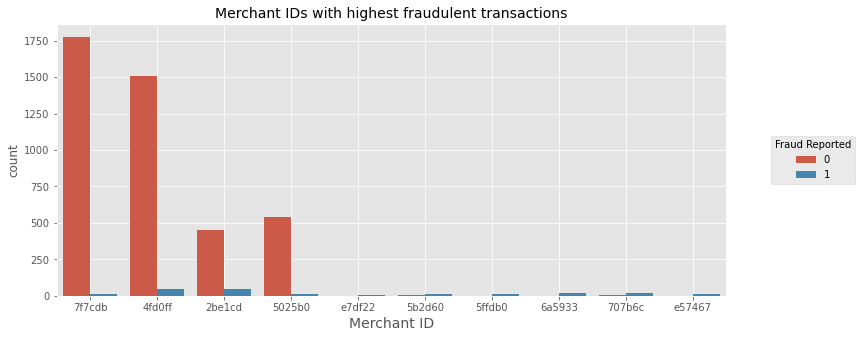

In [39]:
top10merlist = top10_sus_merno['merchantId'].tolist()

top10 = data.loc[data['merchantId'].isin(top10merlist)]

fig = plt.figure(figsize = (12,5))
sns.countplot(data=top10, x='merchantId', hue='fraudReported')
plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.title('Merchant IDs with highest fraudulent transactions', fontsize=14)
plt.xlabel('Merchant ID', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

#### Which country of the merchant has the frauds reported.


In [40]:
grouped_mercntry = pd.DataFrame(data.groupby(data['merchantCountry'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

In [41]:
top10_sus_mercntry = grouped_mercntry[grouped_mercntry['fraudReported'] != 0][:10]
top10_sus_mercntry

,merchantCountry,fraudReported
0,826,314
1,840,257
2,442,139
3,372,26
4,196,23
5,36,18
6,250,15
7,292,14
8,724,11
9,124,10


In [42]:
top10merlist = top10_sus_mercntry['merchantCountry'].tolist()

top10_mercntry0 = data.loc[data['merchantCountry'].isin(top10merlist)]

b = pd.DataFrame(top10_mercntry0.groupby(top10_mercntry0['merchantCountry'])['fraudReported'].count()).reset_index()

top10 = top10_sus_mercntry.merge(b, on='merchantCountry').rename(columns={'fraudReported_x':'fraudReported_1', 'fraudReported_y':'fraudReported'})
top10['percentageFraud'] = top10['fraudReported_1']/top10['fraudReported']

,merchantCountry,fraudReported_1,fraudReported,percentageFraud
0,826,314,95616,0.003284
1,840,257,2873,0.089454
2,442,139,14929,0.009311
3,372,26,1414,0.018388
4,196,23,186,0.123656
5,36,18,83,0.216867
6,250,15,483,0.031056
7,292,14,216,0.064815
8,724,11,298,0.036913
9,124,10,142,0.070423


In [129]:
fig = plt.figure(figsize = (12,5))
bars = plt.bar(data=top10, x='merchantCountry', height='fraudReported_1', color = 'Orange')
plt.title('Merchant country codes with highest fraudulent transactions', fontsize=14)
plt.xlabel('Merchant country code', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

NameError: name 'top10_mercntry0' is not defined

<Figure size 864x360 with 0 Axes>

#### Does the merchant truncated zip has any pattern in fraud transactions?

In [44]:
grouped_merczip = pd.DataFrame(data.groupby(data['merchantZip'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

top10_sus_merczip = grouped_merczip[grouped_merczip['fraudReported'] != 0][:10]
top10_sus_merczip.head(10)

,merchantZip,fraudReported
0,0,74
1,EC3V,14
2,SL1,10
3,RG14,8
4,LS11,7
5,WC2H,6
6,AL10,6
7,WD5,6
8,GY9,5
9,GU24,5


#### Does the merchant category code (mcc) has any pattern in fraud transactions?

In [43]:
grouped_mcc = pd.DataFrame(data.groupby(data['mcc'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

top10_sus_mcc = grouped_mcc[grouped_mcc['mcc'] != 0]
top10_sus_mcc.head(10)

,mcc,fraudReported
0,5735,120
1,5967,59
2,4814,46
3,5734,43
4,5999,33
5,7995,33
6,5969,29
7,5977,25
8,5968,25
9,7372,23


#### Does the point od sale (pos) type has any pattern in fraud transactions?

In [417]:
grouped_pos = pd.DataFrame(data.groupby(data['posEntryMode'])['fraudReported'].count().sort_values(ascending=False)).reset_index()

top10_sus_pos = grouped_pos[grouped_pos['posEntryMode'] != 0]
top10_sus_pos.head(10)

,posEntryMode,fraudReported
0,5,70228
1,81,35832
2,1,10568
3,90,1202
4,7,637
5,80,92
6,79,31
7,2,16
9,91,4


In [73]:
grouped_pos = pd.DataFrame(data.groupby(data['posEntryMode'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

top10_sus_pos = grouped_pos[grouped_pos['posEntryMode'] != 0]
top10_sus_pos['posEntryMode'] = top10_sus_pos['posEntryMode'].astype('string')

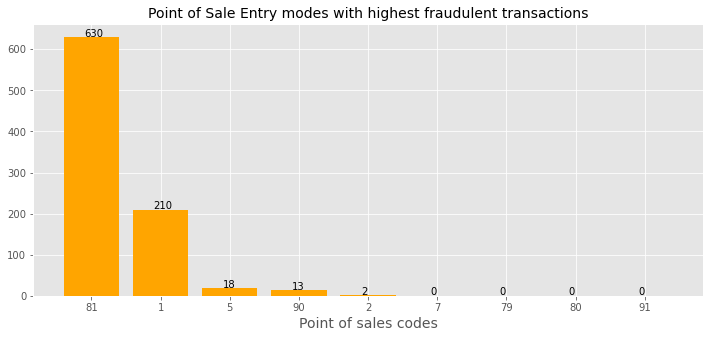

In [84]:
fig = plt.figure(figsize = (12,5))
# plt.xlim(0, 700, 50)
bars = plt.bar(data=top10_sus_pos, x='posEntryMode', height='fraudReported', color = 'Orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.3, yval + 1.5, yval)

plt.title('Point of Sale Entry modes with highest fraudulent transactions', fontsize=14)
plt.xlabel('Point of sales codes', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

In [47]:
grouped_cash = pd.DataFrame(data.groupby(data['availableCash'])['fraudReported'].sum().sort_values(ascending=False)).reset_index()

top10_sus_cash = grouped_cash[grouped_cash['availableCash'] != 0]
top10_sus_cash(10)

,availableCash,fraudReported
0,4500,201
1,1500,177
2,3500,121
3,500,91
4,8500,71
5,7500,50
6,10500,33
7,2500,30
8,9500,29
9,5500,27


#### Summary

* There are certain account numbers which are suspicious and need to be checked.
* There are a couple of merchants who have more fraudulent transcations and they must be verified.
* There are 3 major merchant countries which have more fraudulent against them.
* Merchant zip code has nothing to do with frauds.
* The pos entry mode with 81 as the entry which is e-commerce transaction has 72% of the fraudulent data. 

How many transactions has been done from the account '8b9c15ea' having pos as 81 (e-commerce)?

In [48]:
data.loc[(data['accountNumber']=='8b9c15ea') & (data['posEntryMode'] == 81),['fraudReported']].count()

fraudReported    115
dtype: int64

In [49]:
data.loc[(data['accountNumber']=='8b9c15ea') & (data['posEntryMode'] == 1),['fraudReported']].count()

fraudReported    128
dtype: int64

Now, since our data contains almost 80% of the fraudulent cases having posEntryMode as 81, let us look at the top 3 fraudulent merchant IDs which have 81 as their pos entry mode. We will see how many fraudulent cases there have been from these merchants per month from the historical data provided.

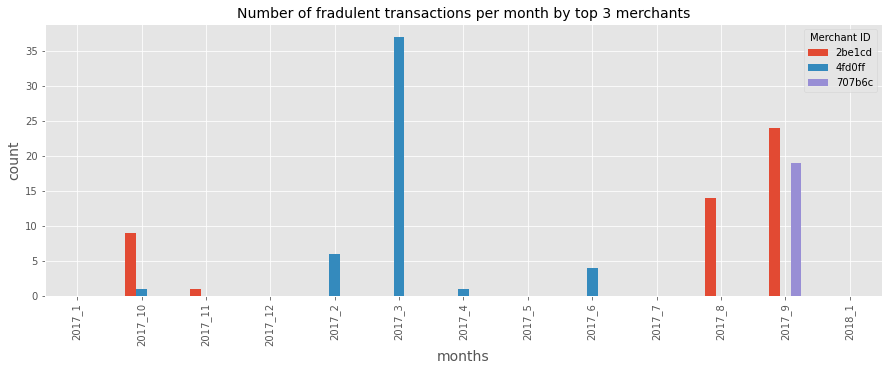

In [42]:
merid = data.groupby(['merchantId'], as_index=False)
# merid_with0Fraud = merid[merid['fraudReported'] != 0]

# df_merId = (data.loc[data['merchantId'].isin(merid_with0Fraud['merchantId'].tolist())])

pos81_merid = merid.filter(lambda x: (x['posEntryMode'] == 81).any())
top10merid = pos81_merid.groupby(['merchantId'], as_index=False)['fraudReported'].sum().sort_values(by='fraudReported',ascending=False)[0:3]

a = pos81_merid.groupby(['merchantId', 'yearMonth'], as_index=False)['fraudReported'].sum().sort_values(by='fraudReported',ascending=False)
df_merIddd = (a.loc[a['merchantId'].isin(top10merid['merchantId'].tolist())])

df_merIddd.pivot("yearMonth", "merchantId", "fraudReported").plot(kind='bar', figsize=(15,5))
plt.title('Number of fradulent transactions per month by top 3 merchants', fontsize=14)
plt.xlabel('months', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(visible=True, which='both')
plt.legend(title='Merchant ID')
plt.show()

Now, since our data contains almost 80% of the fraudulent cases having posEntryMode as 81, let us look at the top 3 fraudulent merchant country codes which have 81 as their pos entry mode. We will see how many fraudulent cases there have been from these merchants per month from the historical data provided.

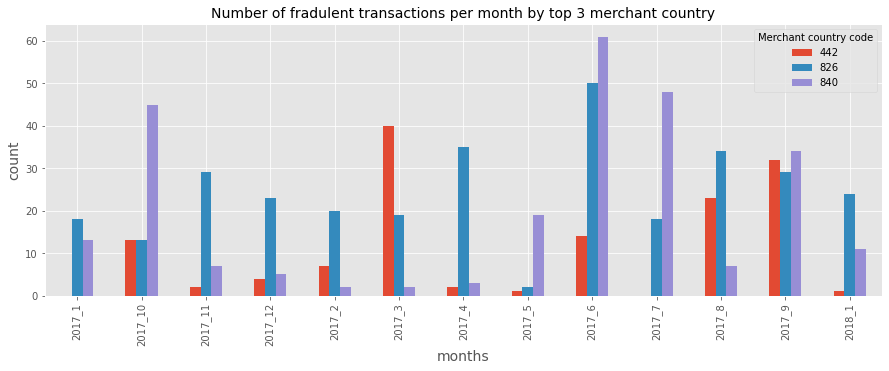

In [39]:
merid = data.groupby(['merchantCountry'], as_index=False)
# merid_with0Fraud = merid[merid['fraudReported'] != 0]

# df_merId = (data.loc[data['merchantId'].isin(merid_with0Fraud['merchantId'].tolist())])

pos81_merid = merid.filter(lambda x: (x['posEntryMode'] == 81).any())

top10merid = pos81_merid.groupby(['merchantCountry'], as_index=False)['fraudReported'].sum().sort_values(by='fraudReported',ascending=False)[0:3]

a = pos81_merid.groupby(['merchantCountry', 'yearMonth'], as_index=False)['fraudReported'].sum().sort_values(by='fraudReported',ascending=False)
df_merIddd = (a.loc[a['merchantCountry'].isin(top10merid['merchantCountry'].tolist())])

df_merIddd.pivot("yearMonth", "merchantCountry", "fraudReported").plot(kind='bar', figsize=(15,5))
plt.title('Number of fradulent transactions per month by top 3 merchant country', fontsize=14)
plt.xlabel('months', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(visible=True, which='both')
plt.legend(title='Merchant country')
plt.show()

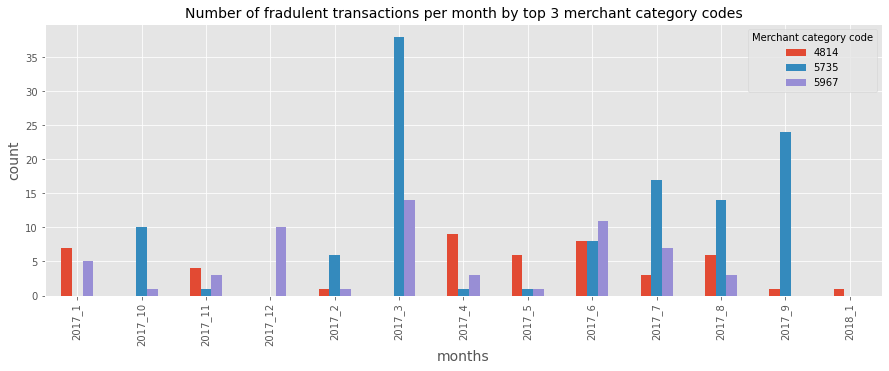

In [46]:
merid = data.groupby(['mcc'], as_index=False)
# merid_with0Fraud = merid[merid['fraudReported'] != 0]

# df_merId = (data.loc[data['merchantId'].isin(merid_with0Fraud['merchantId'].tolist())])

pos81_merid = merid.filter(lambda x: (x['posEntryMode'] == 81).any())
top10merid = pos81_merid.groupby(['mcc'], as_index=False)['fraudReported'].sum().sort_values(by='fraudReported',ascending=False)[0:3]

a = pos81_merid.groupby(['mcc', 'yearMonth'], as_index=False)['fraudReported'].sum().sort_values(by='fraudReported',ascending=False)
df_merIddd = (a.loc[a['mcc'].isin(top10merid['mcc'].tolist())])

df_merIddd.pivot("yearMonth", "mcc", "fraudReported").plot(kind='bar', figsize=(15,5))
plt.title('Number of fradulent transactions per month by top 3 merchant category codes', fontsize=14)
plt.xlabel('months', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(visible=True, which='both')
plt.legend(title='Merchant category code')
plt.show()